# In this notebook we compare different trees obtained for Deltaproteobacteria in terms of their branch lengths
## We compare trees with branch lengths in numbers of events

In [1]:
import sys
from ete3 import Tree, TreeStyle, NodeStyle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy

# Reads in trees
substitutionTreeFile="Concatenate5662_CAT_7000trees_consensus_rooted"
duplicationTreeFile="DuplicationsNoNumber.tree"
transferTreeFile="TransfersNoNumber.tree"
lossTreeFile="LossesNoNumber.tree"

def readTreeFromFile(file):
    try:
        f=open(file, 'r')
    except IOError:
        print ("Unknown file: "+file)
        sys.exit()

    line = ""
    for l in f:
        line += l.strip()
    
    f.close()
    t = Tree( line )
    return t

substitutionTree = readTreeFromFile(substitutionTreeFile)
duplicationTree = readTreeFromFile(duplicationTreeFile)
transferTree = readTreeFromFile(transferTreeFile)
lossTree = readTreeFromFile(lossTreeFile)

### We extract the branch lengths.

In [2]:
def extractBranchLengths(t):
    bls = list()
    for node in t.traverse("postorder"):
        bls.append(node.dist)
    return bls


substitutionTreeBls = extractBranchLengths(substitutionTree)
duplicationTreeBls = extractBranchLengths(duplicationTree)
transferTreeBls = extractBranchLengths(transferTree)
lossTreeBls = extractBranchLengths(lossTree)





### And we plot the correlations between branch lengths


In [3]:
def plotAndComputeCorrelation(x,y,namex, namey, logyn):
    print("Pearson correlation coefficient and p-value: "+ str(scipy.stats.pearsonr(x, y)))
    #Plotting:
    plt.plot(x, y, 'bo')
    plt.xlabel(namex, fontsize=15)
    plt.ylabel(namey, fontsize=15)
#plt.legend(['data'], loc='upper left')
    if logyn:
        plt.yscale('log')



First, substitutions vs duplications

Pearson correlation coefficient and p-value: (0.14100912434979102, 0.11978353883300012)


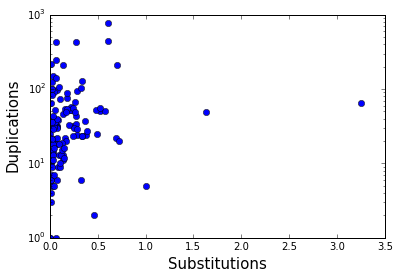

In [4]:
%matplotlib inline

plotAndComputeCorrelation(substitutionTreeBls,duplicationTreeBls,'Substitutions', 'Duplications', True)

Second, substitutions vs transfers.

Pearson correlation coefficient and p-value: (0.22644382451896525, 0.011784050912238445)


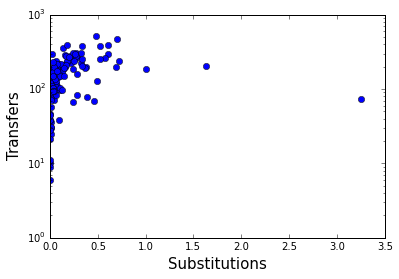

In [5]:
%matplotlib inline

plotAndComputeCorrelation(substitutionTreeBls,transferTreeBls,'Substitutions', 'Transfers', True)


Third, substitutions vs losses.

Pearson correlation coefficient and p-value: (0.18456109416899072, 0.040995793210536008)


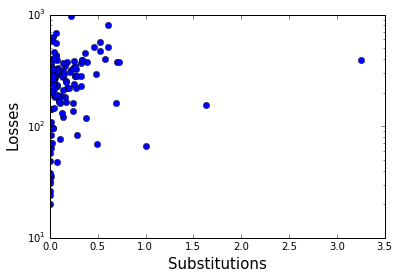

In [6]:
%matplotlib inline
plotAndComputeCorrelation(substitutionTreeBls,lossTreeBls,'Substitutions', 'Losses', True)


Fourth, Duplications vs transfers.

Pearson correlation coefficient and p-value: (0.4126487112462246, 2.1070607038867439e-06)


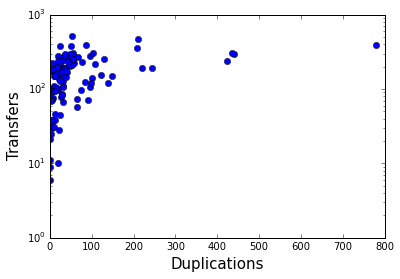

In [7]:
%matplotlib inline
plotAndComputeCorrelation(duplicationTreeBls,transferTreeBls,'Duplications', 'Transfers', True)


Fifth, transfer vs losses.

Pearson correlation coefficient and p-value: (0.38073146973326044, 1.3980192045095091e-05)


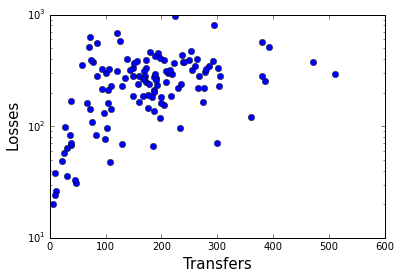

In [8]:
%matplotlib inline
plotAndComputeCorrelation(transferTreeBls,lossTreeBls,'Transfers', 'Losses', True)


## Computing an ultrametricity index

In [18]:
# We compute all the leaf to root distances, and we compute the normalized variance across leaves.
def computeUltrametricityIndex(t):
    root = t.get_tree_root()
    leaves = root.get_leaves()
    distances=list()
    for leaf in leaves:
        distances.append(root.get_distance(leaf))
    meanDist = np.mean(distances)
    for i in range(len(distances)):
        distances[i] = distances[i] / meanDist
    return np.var(distances) 

print ("Deviance from ultrametricity of the substitution tree: " + str(computeUltrametricityIndex(substitutionTree)))
print ("Deviance from ultrametricity of the duplication tree: " + str(computeUltrametricityIndex(duplicationTree)))
print ("Deviance from ultrametricity of the transfer tree: " + str(computeUltrametricityIndex(transferTree)))
print ("Deviance from ultrametricity of the loss tree: " + str(computeUltrametricityIndex(lossTree)))

Deviance from ultrametricity of the substitution tree: 0.225613701204
Deviance from ultrametricity of the duplication tree: 0.841012737739
Deviance from ultrametricity of the transfer tree: 0.109992274648
Deviance from ultrametricity of the loss tree: 0.174154581452


It appears that the transfer tree is more ultrametric than the loss tree, which is more ultrametric than the substitution tree, itself finally much more ultrametric than the duplication tree.

Finally I transformed the 4 trees above into ultrametric trees using fastdate. The duplication tree could not be transformed, there was a problem in fastdate. Eric evaluated the other trees in terms of the numbers of undated transfers they disagree with. The results were the following:

Transfer tree: 2848

Loss tree: 2992

Substitution tree: 2934

# Conclusion
They are all on the good side of the random distribution, but within the distribution. It seems like fastdate provides dated trees that are not as good as Phylobayes's relaxed clock models.
It is interesting to note that the transfer-based clocklike tree is the best, because the two transfer-based signals are not quite the same: one one hand, it's the general numbers of transfers, on the other, it's where they come from and where to go to.
